In [1]:
import pandas as pd
df=pd.read_csv("../input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv")

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['Ticket'],axis='columns',inplace=True)

In [4]:
df.drop(['Parch'],axis='columns',inplace=True)

In [5]:
df.drop(['SibSp'],axis='columns',inplace=True)

In [6]:
df.drop(['Embarked'],axis='columns',inplace=True)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Fare             0
Cabin          687
dtype: int64

In [9]:
df['Age'].mean()

29.69911764705882

In [10]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [11]:
dummies=pd.get_dummies(df.Sex)
merge=pd.concat([df,dummies],axis='columns')
merge

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,71.2833,C85,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,7.9250,NaN,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,53.1000,C123,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,8.0500,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,13.0000,NaN,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,30.0000,B42,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,23.4500,NaN,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,30.0000,C148,0,1


<AxesSubplot:xlabel='Survived'>

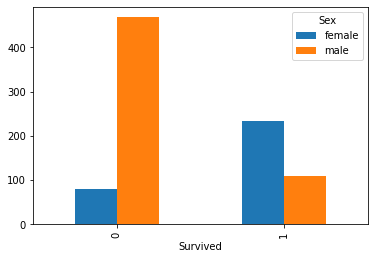

In [12]:
pd.crosstab(merge.Survived,merge.Sex).plot(kind='bar')

In [13]:
merge.drop(['Sex'],axis='columns',inplace=True)

In [14]:
merge.drop(['Name'],axis='columns',inplace=True)

In [15]:
merge.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.069809
Fare           0.257307
female         0.543351
male          -0.543351
Name: Survived, dtype: float64

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [17]:
from sklearn import tree 

In [18]:
model=tree.DecisionTreeClassifier()

In [19]:
merge.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Fare', 'Cabin', 'female',
       'male'],
      dtype='object')

In [20]:
x= merge[['PassengerId', 'Pclass', 'Age', 'Fare',
       'female', 'male']]

In [21]:
y=merge['Survived']

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [23]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [24]:
model.predict(xtest)

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1])

In [25]:
model.score(xtest,ytest)

0.7821229050279329